In [2]:
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

### Label dan jumlah data dalam setiap label

In [3]:
dataset = 'MNIST Dataset'
data = []

for label in os.listdir(dataset):
    label_path = os.path.join(dataset, label)
    count = len(os.listdir(label_path))
    
    data.append((count, label))


for count, label in data:
    print(f'Category {label} has {count} images')

Category A has 5996 images
Category B has 5996 images
Category C has 5996 images
Category D has 5996 images
Category E has 5996 images
Category F has 5996 images
Category G has 5996 images
Category H has 5996 images
Category I has 5996 images
Category J has 5996 images
Category K has 5996 images
Category L has 5996 images
Category M has 5996 images
Category N has 5996 images
Category Nothing has 5996 images
Category O has 5996 images
Category P has 5996 images
Category Q has 5996 images
Category R has 5966 images
Category S has 5996 images
Category Space has 5886 images
Category T has 5648 images
Category U has 4542 images
Category V has 5996 images
Category W has 5996 images
Category X has 5996 images
Category Y has 5720 images
Category Z has 5996 images


### Function untuk mendapatkan evaluation dari model

In [4]:
def get_evaluation(y_test, y_test_pred):
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average="weighted")
    recall = recall_score(y_test, y_test_pred, average="weighted")
    f1 = f1_score(y_test, y_test_pred, average="weighted")
    cm = confusion_matrix(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap="viridis")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    
    print(report)

### Load data yang sudah dipreprocess oleh mediapipe

In [5]:
output_path = 'MNIST Dataset Processed/output.csv'

df = pd.read_csv(output_path)

### EDA data yang sudah di preprocess

In [6]:
df.head()

,Image_No,Label,Landmark_1_x,Landmark_1_y,Landmark_1_z,Landmark_2_x,Landmark_2_y,Landmark_2_z,Landmark_3_x,Landmark_3_y,...,Landmark_39_z,Landmark_40_x,Landmark_40_y,Landmark_40_z,Landmark_41_x,Landmark_41_y,Landmark_41_z,Landmark_42_x,Landmark_42_y,Landmark_42_z
0,10.jpg,A,0.0,0.0,0.0,-0.170927,-0.048236,-0.037922,-0.304534,-0.180382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10.jpg,A,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.019590,0.020981,-0.457122,-0.062364,0.008663,-0.350085,-0.030556,0.014394,-0.290293,0.009869
2,100.jpg,A,0.0,0.0,0.0,-0.102444,-0.005990,-0.040114,-0.191728,-0.108021,...,-0.030801,-0.056995,-0.289178,-0.038694,-0.076732,-0.202964,-0.014929,-0.076062,-0.166585,0.008049
3,100.jpg,A,0.0,0.0,0.0,-0.059198,-0.110328,-0.009876,-0.116228,-0.232210,...,-0.029405,0.046481,-0.269913,-0.059896,0.043397,-0.199472,-0.037555,0.041827,-0.173103,-0.010595
4,1000.jpg,A,0.0,0.0,0.0,-0.105603,-0.059444,-0.039185,-0.181308,-0.149336,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df.describe()

,Landmark_1_x,Landmark_1_y,Landmark_1_z,Landmark_2_x,Landmark_2_y,Landmark_2_z,Landmark_3_x,Landmark_3_y,Landmark_3_z,Landmark_4_x,...,Landmark_39_z,Landmark_40_x,Landmark_40_y,Landmark_40_z,Landmark_41_x,Landmark_41_y,Landmark_41_z,Landmark_42_x,Landmark_42_y,Landmark_42_z
count,331340.0,331340.0,331340.0,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,...,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000,331340.000000
mean,0.0,0.0,0.0,-0.028400,-0.034176,-0.021542,-0.037130,-0.079635,-0.035461,-0.020260,...,-0.037387,0.091043,-0.123620,-0.056470,0.082202,-0.115948,-0.053822,0.075790,-0.112215,-0.047142
std,0.0,0.0,0.0,0.062444,0.050677,0.041916,0.114457,0.108720,0.064334,0.149973,...,0.059612,0.135624,0.171744,0.078780,0.144393,0.177124,0.076298,0.153790,0.186590,0.072485
min,0.0,0.0,0.0,-0.198321,-0.219931,-0.309747,-0.354442,-0.392413,-0.539041,-0.458432,...,-0.647711,-0.253984,-0.645533,-0.813714,-0.332851,-0.699026,-0.852993,-0.419986,-0.797679,-0.910875
25%,0.0,0.0,0.0,-0.083742,-0.075154,-0.042743,-0.120672,-0.182790,-0.065543,-0.056121,...,-0.063359,0.000000,-0.286922,-0.098984,0.000000,-0.246699,-0.093363,0.000000,-0.222143,-0.081222
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.139243,0.000000,0.000000,0.109413,0.000000,0.000000,0.092082,0.000000,0.000000
max,0.0,0.0,0.0,0.249167,0.131519,0.224089,0.409415,0.269543,0.303032,0.553662,...,0.227338,0.627159,0.399112,0.240855,0.755456,0.541721,0.265469,0.863501,0.672854,0.288745


In [8]:
df.dtypes

Image_No          object
Label             object
Landmark_1_x     float64
Landmark_1_y     float64
Landmark_1_z     float64
                  ...   
Landmark_41_y    float64
Landmark_41_z    float64
Landmark_42_x    float64
Landmark_42_y    float64
Landmark_42_z    float64
Length: 128, dtype: object

In [9]:
df.shape

(331340, 128)

In [10]:
df.isnull().sum()

Image_No         0
Label            0
Landmark_1_x     0
Landmark_1_y     0
Landmark_1_z     0
                ..
Landmark_41_y    0
Landmark_41_z    0
Landmark_42_x    0
Landmark_42_y    0
Landmark_42_z    0
Length: 128, dtype: int64

### Buat setiap data dalam setiap label memiliki jumlah yang sama

In [11]:
min_samples = df['Label'].value_counts().min()

balanced_df = pd.concat([df[df['Label'] == label].sample(min_samples) for label in df['Label'].unique()])

balanced_df['Label'].value_counts()

Label
A          9084
B          9084
Y          9084
X          9084
W          9084
V          9084
U          9084
T          9084
Space      9084
S          9084
R          9084
Q          9084
P          9084
O          9084
Nothing    9084
N          9084
M          9084
L          9084
K          9084
J          9084
I          9084
H          9084
G          9084
F          9084
E          9084
D          9084
C          9084
Z          9084
Name: count, dtype: int64

### Encode label

In [12]:
encoder = LabelEncoder()

label = balanced_df['Label']
y_data = encoder.fit_transform(label)

In [13]:
x_data = balanced_df.drop(columns=['Image_No', 'Landmark_1_x', 'Landmark_1_y', 'Landmark_1_z', 'Label'])

In [14]:
x_data.head()

,Landmark_2_x,Landmark_2_y,Landmark_2_z,Landmark_3_x,Landmark_3_y,Landmark_3_z,Landmark_4_x,Landmark_4_y,Landmark_4_z,Landmark_5_x,...,Landmark_39_z,Landmark_40_x,Landmark_40_y,Landmark_40_z,Landmark_41_x,Landmark_41_y,Landmark_41_z,Landmark_42_x,Landmark_42_y,Landmark_42_z
3756,-0.153948,-0.056373,-0.066763,-0.290870,-0.184332,-0.091886,-0.338261,-0.322675,-0.116102,-0.272173,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.026233,0.07802,-0.321551,-0.062806,0.065465,-0.236607,-0.035887,0.059198,-0.209787,-0.003301
7652,-0.132758,-0.076038,-0.050962,-0.239760,-0.220223,-0.065082,-0.274026,-0.355252,-0.081470,-0.215923,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10980,-0.146467,-0.059243,-0.074601,-0.283634,-0.228015,-0.094067,-0.327670,-0.398259,-0.112856,-0.274224,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6816,-0.105308,-0.061772,-0.037737,-0.190679,-0.178604,-0.043834,-0.213876,-0.283930,-0.052108,-0.163624,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Replace 0 dengan nilai yang sangat kecil

In [15]:
x_data.replace(0, 10e-5, inplace=True)

In [16]:
x_data.head()

,Landmark_2_x,Landmark_2_y,Landmark_2_z,Landmark_3_x,Landmark_3_y,Landmark_3_z,Landmark_4_x,Landmark_4_y,Landmark_4_z,Landmark_5_x,...,Landmark_39_z,Landmark_40_x,Landmark_40_y,Landmark_40_z,Landmark_41_x,Landmark_41_y,Landmark_41_z,Landmark_42_x,Landmark_42_y,Landmark_42_z
3756,-0.153948,-0.056373,-0.066763,-0.290870,-0.184332,-0.091886,-0.338261,-0.322675,-0.116102,-0.272173,...,0.000100,0.00010,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100
1143,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,...,-0.026233,0.07802,-0.321551,-0.062806,0.065465,-0.236607,-0.035887,0.059198,-0.209787,-0.003301
7652,-0.132758,-0.076038,-0.050962,-0.239760,-0.220223,-0.065082,-0.274026,-0.355252,-0.081470,-0.215923,...,0.000100,0.00010,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100
10980,-0.146467,-0.059243,-0.074601,-0.283634,-0.228015,-0.094067,-0.327670,-0.398259,-0.112856,-0.274224,...,0.000100,0.00010,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100
6816,-0.105308,-0.061772,-0.037737,-0.190679,-0.178604,-0.043834,-0.213876,-0.283930,-0.052108,-0.163624,...,0.000100,0.00010,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100


### Normalisasi data

In [17]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(x_data) 

In [18]:
x_data = pd.DataFrame(scaled_data)

In [19]:
correlation_matrix = x_data.corr()

print(correlation_matrix)

          0         1         2         3         4         5         6    \
0    1.000000  0.447647  0.335737  0.972092  0.513123  0.368424  0.874638   
1    0.447647  1.000000  0.050864  0.300889  0.973528  0.050129  0.138700   
2    0.335737  0.050864  1.000000  0.232314  0.103217  0.983361  0.074794   
3    0.972092  0.300889  0.232314  1.000000  0.378534  0.275846  0.953191   
4    0.513123  0.973528  0.103217  0.378534  1.000000  0.098242  0.195957   
..        ...       ...       ...       ...       ...       ...       ...   
118 -0.281894 -0.361321 -0.329281 -0.207358 -0.386193 -0.351819 -0.098835   
119 -0.292007 -0.425912 -0.277967 -0.212062 -0.458405 -0.279651 -0.102650   
120  0.271751  0.278564  0.218376  0.223450  0.300413  0.228182  0.147885   
121 -0.259347 -0.327921 -0.307959 -0.191030 -0.351598 -0.329966 -0.089983   
122 -0.268433 -0.394242 -0.249669 -0.195212 -0.424058 -0.248983 -0.095301   

          7         8         9    ...       113       114       115  \
0  

In [20]:
plt.figure(figsize=(160, 90))
sns.heatmap(correlation_matrix)
plt.show()

In [32]:
def logistic_regression_model(x_data, label):
    x_train, x_test, y_train, y_test = train_test_split(x, label)
    
    model = LogisticRegression(max_iter=300)
    model.fit(x_train, y_train)
    
    y_test_pred = model.predict(x_test)
    
    get_evaluation(y_test, y_test_pred)
    
    with open('logistic_regression_model.pkl', 'wb') as file:
        pickle.dump(model, file)
        
    return model

In [22]:
def knn_model(x_data, label, n_neighbors=3):
    x = np.array(x_data)
    x_train, x_test, y_train, y_test = train_test_split(x, label)
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    y_test_pred = model.predict(x_test)
    
    get_evaluation(y_test, y_test_pred)
    
    with open('knn_model.pkl', 'wb') as file:
        pickle.dump(model, file)
        
    return model

In [30]:
def svm_model(x_data, label, kernel='rbf', degree=3):
    x = np.array(x_data)
    x_train, x_test, y_train, y_test = train_test_split(x, label)
    
    model = svm.SVC(kernel=kernel, degree=degree)
    model.fit(x_train, y_train)
    
    y_test_pred = model.predict(x_test)
    
    get_evaluation(y_test, y_test_pred)
    
    with open('svm_model.pkl', 'wb') as file:
        pickle.dump(model, file)
        
    return model

In [24]:
x = np.array(x_data)

C:\Users\rober\anaconda3\envs\new-misc-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.990234006416305
Precision: 0.9914779571848101
Recall: 0.990234006416305
F1: 0.9904280131281187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2276
           1       0.99      1.00      1.00      2258
           2       1.00      1.00      1.00      2350
           3       1.00      1.00      1.00      2302
           4       1.00      1.00      1.00      2354
           5       1.00      1.00      1.00      2296
           6       1.00      1.00      1.00      2304
           7       1.00      1.00      1.00      2290
           8       1.00      1.00      1.00      2325
           9       1.00      1.00      1.00      2247
          10       1.00      0.99      1.00      2323
          11       1.00      1.00      1.00      2278
          12       0.99      0.96      0.97      2217
          13       1.00      0.89      0.94      2276
          14       0.83      1.00      0.91      2261
          15       1.00     

LogisticRegression(max_iter=300)

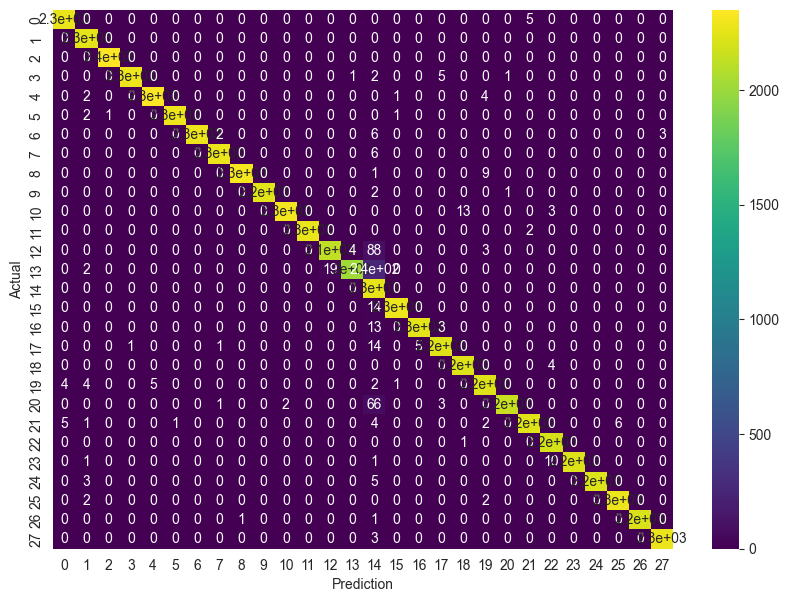

In [33]:
logistic_regression_model(x_data, y_data)

Accuracy: 0.9913820217651129
Precision: 0.9925570232318637
Recall: 0.9913820217651129
F1: 0.9915631644779263
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2223
           1       1.00      1.00      1.00      2260
           2       1.00      1.00      1.00      2257
           3       1.00      1.00      1.00      2288
           4       1.00      1.00      1.00      2266
           5       1.00      1.00      1.00      2317
           6       1.00      1.00      1.00      2218
           7       1.00      1.00      1.00      2310
           8       1.00      1.00      1.00      2241
           9       1.00      1.00      1.00      2336
          10       1.00      1.00      1.00      2256
          11       1.00      1.00      1.00      2249
          12       0.98      0.95      0.97      2290
          13       1.00      0.89      0.94      2267
          14       0.83      1.00      0.91      2225
          15       1.00   

KNeighborsClassifier(n_neighbors=3)

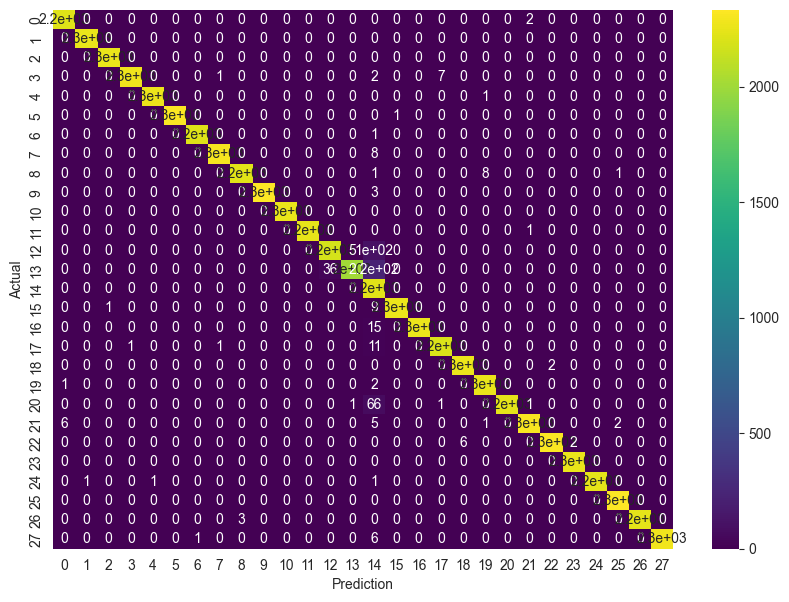

In [28]:
knn_model(x_data, y_data)

Accuracy: 0.9910045920613952
Precision: 0.9922660352548699
Recall: 0.9910045920613952
F1: 0.9912035680385443
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2224
           1       1.00      1.00      1.00      2291
           2       1.00      1.00      1.00      2319
           3       1.00      1.00      1.00      2226
           4       1.00      1.00      1.00      2302
           5       1.00      1.00      1.00      2194
           6       1.00      1.00      1.00      2248
           7       1.00      1.00      1.00      2328
           8       1.00      1.00      1.00      2259
           9       1.00      1.00      1.00      2266
          10       1.00      1.00      1.00      2309
          11       1.00      1.00      1.00      2233
          12       0.99      0.95      0.97      2264
          13       1.00      0.89      0.94      2266
          14       0.83      1.00      0.91      2295
          15       1.00   

SVC()

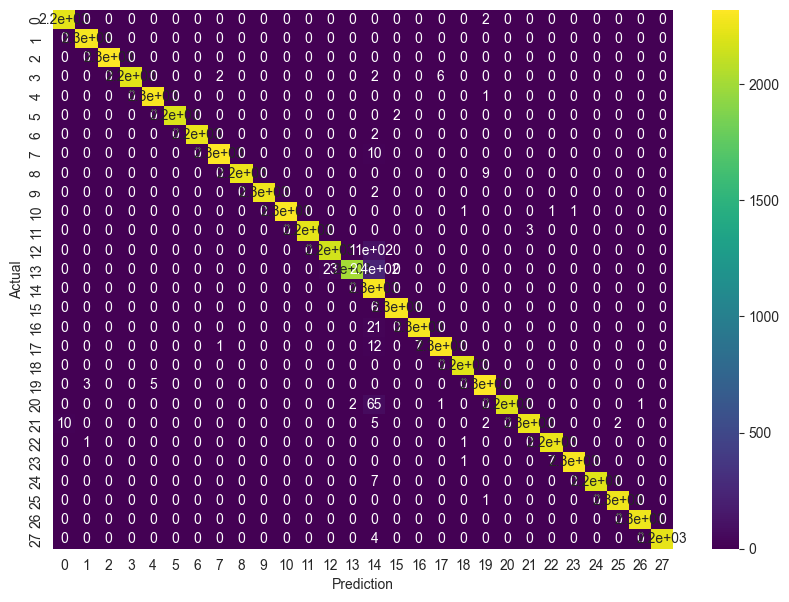

In [29]:
svm_model(x_data, y_data)

Accuracy: 0.992011071271309
Precision: 0.9932787717092264
Recall: 0.992011071271309
F1: 0.9922244426878039
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2233
           1       1.00      1.00      1.00      2249
           2       1.00      1.00      1.00      2242
           3       1.00      1.00      1.00      2227
           4       1.00      1.00      1.00      2178
           5       1.00      1.00      1.00      2247
           6       1.00      1.00      1.00      2303
           7       1.00      1.00      1.00      2212
           8       1.00      1.00      1.00      2211
           9       1.00      1.00      1.00      2224
          10       1.00      1.00      1.00      2314
          11       1.00      1.00      1.00      2346
          12       0.99      0.96      0.97      2274
          13       1.00      0.89      0.94      2309
          14       0.83      1.00      0.91      2306
          15       1.00     

SVC(kernel='poly')

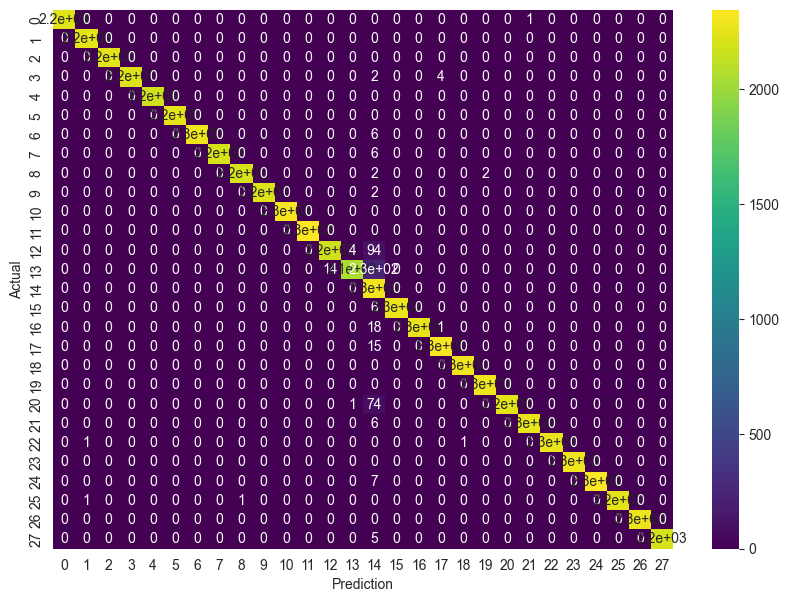

In [31]:
svm_model(x_data, y_data, kernel='poly', degree=3)

In [26]:
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train)


KeyboardInterrupt



In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
get_evaluation(y_test, y_test_pred)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
get_evaluation(y_test, y_test_pred)

In [ ]:
model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
get_evaluation(y_test, y_test_pred)

In [ ]:
model_poly = svm.SVC(kernel='poly', degree=3)
model_poly.fit(x_train, y_train)

In [ ]:
y_test_pred_poly = model_poly.predict(x_test)

In [ ]:
get_evaluation(y_test, y_test_pred_poly)

In [ ]:
num_classes = len(data)

classes = []

for _, c in data:
    classes.append(c)

In [ ]:
classes

In [ ]:
sampled = df.sample(10000)

In [ ]:
y_data = sampled['Label']
x_data = sampled.drop(columns=['Label', 'Image_No'])

In [ ]:
num_classes = len(y_data.unique())

In [ ]:
print(num_classes)

In [ ]:
x_transformed = MinMaxScaler().fit_transform(x_data)
y_transformed = LabelEncoder().fit_transform(y_data)
data = {}

pca = PCA(n_components=4)
data["PCA"] = pca.fit_transform(x_transformed)

lda = LDA(n_components=3)
data["LDA"] = lda.fit_transform(x_transformed, y_transformed)

tsne = TSNE(n_components=3)
data["TSNE"] = tsne.fit_transform(x_transformed)

num_classes = len(classes)


In [ ]:
colors = plt.cm.tab20(np.linspace(0, 1, num_classes))


for key, value in data.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(num_classes):
        ax.scatter(data[key][y_transformed == i, 0], data[key][y_transformed == i, 1], label=classes[i], color=colors[i])
    fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel(f"{key} 1")
    ax.set_ylabel(f"{key} 2")
    plt.tight_layout(rect=(0., 0., 1., 1.))
    fig.suptitle(f'{key} Transformed Data', y=1.02)

In [ ]:
pca_x = data["PCA"]
pca_y = y_transformed

x_train, x_test, y_train, y_test = train_test_split(pca_x, pca_y)

model = svm.SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)

pca_y_pred = model.predict(x_test)

get_evaluation(y_test, pca_y_pred)

In [ ]:
pca_x = data["LDA"]
pca_y = y_transformed

x_train, x_test, y_train, y_test = train_test_split(pca_x, pca_y)

model = svm.SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)

lda_y_pred = model.predict(x_test)

get_evaluation(y_test, lda_y_pred)

In [ ]:
pca_x = data["TSNE"]
pca_y = y_transformed

x_train, x_test, y_train, y_test = train_test_split(pca_x, pca_y)

model = svm.SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)

tsne_y_pred = model.predict(x_test)

get_evaluation(y_test, tsne_y_pred)